In [1]:
import sys; sys.path.append("../src/")
from glossarizers import ckan_glossarizer

In [4]:
ckan_glossarizer.write_resource_representation(domain="catalog.data.ug",
                                               out="../data/uganda/resource lists/resources-new.json",
                                               protocol="http")

100%|██████████| 395/395 [06:01<00:00,  1.44it/s]


In [5]:
ckan_glossarizer.write_glossary(resource_filename="../data/uganda/resource lists/resources-new.json",
                                glossary_filename="../data/uganda/glossaries/resources-new.json")

In [1]:
import json

with open("../data/uganda/glossaries/resources-new.json", "r") as f:
    uganda_data = json.loads(f.read())

In [2]:
import pandas as pd

updated_dates = pd.to_datetime([d['last_updated'] for d in uganda_data])

In [3]:
updated_dates

DatetimeIndex(['2017-02-15 10:26:35.978534', '2017-02-15 10:26:35.978534',
               '2017-02-15 10:26:35.978534', '2017-02-15 10:26:35.978534',
               '2017-02-15 10:26:35.978534', '2017-02-15 10:26:35.978534',
               '2017-02-15 10:26:35.978534', '2017-02-15 10:26:35.978534',
               '2017-02-15 10:26:35.978534', '2017-02-15 10:26:35.978534',
               ...
               '2015-02-25 07:47:35.973663', '2015-02-25 07:47:35.973663',
               '2014-07-23 08:12:19.812546', '2014-07-23 08:56:13.316146',
               '2014-07-22 12:36:14.335724', '2014-03-24 16:11:46.392058',
               '2014-08-15 15:02:32.522378', '2014-08-15 15:02:32.522378',
               '2015-02-17 09:50:16.432321', '2017-02-15 10:26:35.978534'],
              dtype='datetime64[ns]', length=2353, freq=None)

In [4]:
freshness = updated_dates

In [5]:
backwards_facing_cumsum = (len(freshness) - pd.Series(range(len(freshness)), index=freshness.values).resample('W').count().cumsum())

In [6]:
backwards_facing_cumsum[:5]

2014-02-23    2328
2014-03-02    2328
2014-03-09    2328
2014-03-16    2316
2014-03-23    2316
Freq: W-SUN, dtype: int64

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import json
%matplotlib inline

/home/alex/miniconda3/envs/temp-test-env/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [9]:
import seaborn as sns

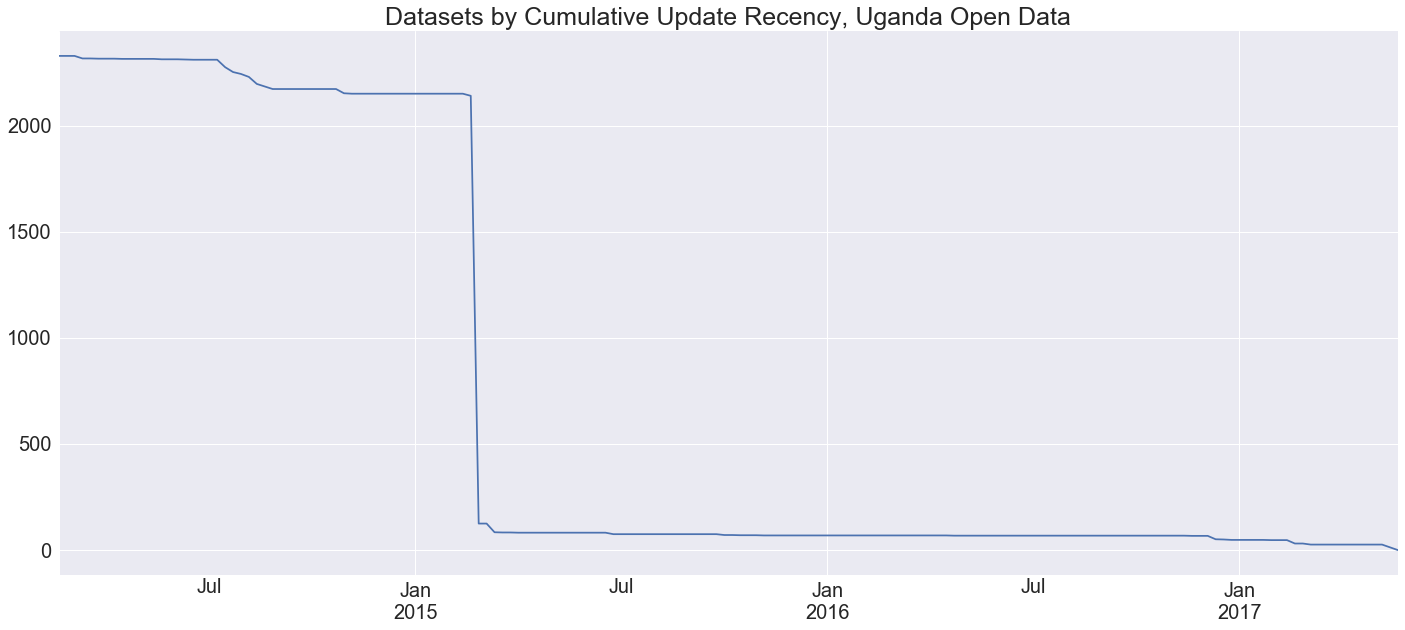

In [10]:
pd.Series(backwards_facing_cumsum).plot(figsize=(24, 10), fontsize=20)
plt.title('Datasets by Cumulative Update Recency, Uganda Open Data', fontsize=25)